<a href="https://colab.research.google.com/github/JayKarhade/Breath-Classification/blob/main/Formal_Project_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification (Normal vs Slow)**

In [ ]:
#importing necessary for excel dataset upload
import pandas as pd
import numpy as np
from google.colab import files
import io
uploaded = files.upload()
df1 = pd.read_csv(io.StringIO(uploaded['data1.csv'].decode('utf-8')),header=None)
#df1.sample(frac=1)

Saving data1.csv to data1.csv


In [ ]:
df1 = df1.sample(frac=1)

In [ ]:
z = df1.to_numpy()[1:,:]

In [ ]:
#Debug step
y = z[:,421]
y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
from keras.utils import to_categorical

#Splitting Dataset into train and test
#Assuming 1000 entries
##200 time steps in each row

arr_df1 = z.copy()
#80-20 train-test split
train = arr_df1[:100,:].copy()
test = arr_df1[80:100,:].copy()

train_x = train[:,:421].copy()
#train_x = (train_x-np.min(train_x))/(np.max(train_x)-np.min(train_x))
test_x = test[:,:421].copy()
train_y = train[:,421].copy()
test_y = test[:,421].copy()

##One-hot encoding

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
train_y.shape

(100, 2)

In [ ]:
##Reshaping data

train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)


In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import sklearn
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [ ]:
##Important parameters

epochs = 100
input_s= (train_x.shape[1],1)

##Assume each row is 420 time steps 
#Sample-Current-Model 
#I/P-->1DConvLayer-->BatchNormalization-->MaxPool-->1DConvLayer-->BatchNormalization-->MaxPool-->Flattenlayer-->Dense-->Dense-->Dense-->Dense-->O/p

model = Sequential()

model.add(Conv1D(filters=20, kernel_size=7, activation='relu',input_shape=(input_s)))
model.add(MaxPooling1D(pool_size=3, strides = 3))
model.add(Conv1D(filters=60, kernel_size=7, activation='relu'))
model.add(Dropout(0.7))
model.add(MaxPooling1D(pool_size=3, strides = 3))
model.add(Conv1D(filters=120, kernel_size=7,))
model.add(Conv1D(filters=120,kernel_size=7,))
model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

###End of model definition
print(model.summary())
#Set loss function
opt = keras.optimizers.Adam(lr=0.00005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

##Training and fitting the model
model.fit(train_x, train_y,epochs=30,verbose=1)
K.clear_session()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 415, 20)           160       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 138, 20)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 132, 60)           8460      
_________________________________________________________________
dropout_1 (Dropout)          (None, 132, 60)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 44, 60)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 38, 120)           50520     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 32, 120)          

In [ ]:
##Testing the model
_, accuracy = model.evaluate(test_x, test_y,verbose=1)
print(accuracy) 

1/1 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 1.0000
1.0


**4-class classification**

In [ ]:
#importing necessary for excel dataset upload
import pandas as pd
import numpy as np
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import sklearn
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras import backend as K

In [ ]:
'''
##Split for leave one subject
x_test = x[:102,:].copy()
y_test = y[:102,:].copy()

x_train = x[102:,:].copy()
y_train = y[102:,:].copy()

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
'''

'\n##Split for leave one subject\nx_test = x[:102,:].copy()\ny_test = y[:102,:].copy()\n\nx_train = x[102:,:].copy()\ny_train = y[102:,:].copy()\n\nx_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)\nx_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)\n'

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/breath_detect/dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/breath_detect/class_labels.csv')

x = df1.to_numpy()[:,1:390]*100000000
x = x[:,::2]
y = df2.to_numpy()[:,1]
y = to_categorical(y)
print(x.shape,y.shape)

#Shuffle data
indices = list(range(x.shape[0]))
np.random.shuffle(indices)
x = x[indices]
y=y[indices]
x = x.reshape(x.shape[0],x.shape[1],1)

(455, 195) (455, 4)


In [ ]:
'''
acc = []
sb = []
fb = []
db = []
nb = []
F1 = []
Kappa = []
for i in range(1):
  #Changing data
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
  x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=2/8, random_state=1)

  ##Important parameters
  epochs = 100
  input_s= (x_train.shape[1],1)

  ##Assume each row is 200 time steps 
  #Sample-Current-Model 
  #I/P-->1DConvLayer-->BatchNormalization-->MaxPool-->1DConvLayer-->BatchNormalization-->MaxPool-->Flattenlayer-->Dense-->Dense-->Dense-->Dense-->O/p

  model = Sequential()
  model.add(Conv1D(filters=60, kernel_size=10, activation='relu',input_shape=(input_s)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=8))
  model.add(Conv1D(filters=100,kernel_size=20,activation='relu'))
#  model.add(Conv1D(filters=60,kernel_size=10))
#  model.add(MaxPooling1D(pool_size=4))
  model.add(Flatten())
  #model.add(BatchNormalization())
  model.add(Dense(1000,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(250,activation='relu'))
  model.add(Dense(100,activation='relu'))
  #model.add(Dense(50,activation='relu'))
  #model.add(Dropout(0.3))
  model.add(Dense(4,activation='softmax'))

  ###End of model definition
#  print(model.summary())
  #Set loss function
  opt = keras.optimizers.Adam(lr=0.00002)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  ##Training and fitting the model
  hist = model.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=(x_test,y_test),verbose=0)

  _, accuracy = model.evaluate(x_test,y_test,verbose=1)

  print(accuracy)


  Z=model.predict_classes(x_test)
  y_test_class = np.zeros(y_test.shape[0])

  for i in range(y_test.shape[0]):
    if y_test[i][0]==1:
      y_test_class[i]=0
    elif y_test[i][1]==1:
      y_test_class[i]=1
    elif y_test[i][2]==1:
      y_test_class[i]=2
    elif y_test[i][3]==1:
      y_test_class[i]=3
  
  cm = sklearn.metrics.confusion_matrix(y_test_class,Z)
  print(cm) 

#  print("Normal breath accuracy : ", (cm[0,0]/np.sum(cm[:,0])) )
#  print("Slow breath accuracy : ", (cm[1,1]/np.sum(cm[:,1])) )
#  print("Deep breath accuracy : ", (cm[2,2]/np.sum(cm[:,2])) )
#  print("Fast breath accuracy : ", (cm[3,3]/np.sum(cm[:,3])) )

#  print("F1-Score is : ", sklearn.metrics.f1_score(y_test_class,Z,average='micro'))
#  print("Kappa score is : ",sklearn.metrics.cohen_kappa_score(y_test_class,Z))


  nb.append((cm[0,0]/np.sum(cm[:,0])))
  sb.append((cm[1,1]/np.sum(cm[:,1])))
  db.append((cm[2,2]/np.sum(cm[:,2])))
  fb.append((cm[3,3]/np.sum(cm[:,3])))
  F1.append(sklearn.metrics.f1_score(y_test_class,Z,average='micro'))
  Kappa.append(sklearn.metrics.cohen_kappa_score(y_test_class,Z))
  acc.append(accuracy)
  K.clear_session()

print("normal",nb)
print("slow",sb)
print("deep",db)
print("FAST",fb)
print("F1",F1)
print("Kappa",Kappa)
print("accuracy",acc)
'''

'\nacc = []\nsb = []\nfb = []\ndb = []\nnb = []\nF1 = []\nKappa = []\nfor i in range(1):\n  #Changing data\n  from sklearn.model_selection import train_test_split\n  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)\n  x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=2/8, random_state=1)\n\n  ##Important parameters\n  epochs = 100\n  input_s= (x_train.shape[1],1)\n\n  ##Assume each row is 200 time steps \n  #Sample-Current-Model \n  #I/P-->1DConvLayer-->BatchNormalization-->MaxPool-->1DConvLayer-->BatchNormalization-->MaxPool-->Flattenlayer-->Dense-->Dense-->Dense-->Dense-->O/p\n\n  model = Sequential()\n  model.add(Conv1D(filters=60, kernel_size=10, activation=\'relu\',input_shape=(input_s)))\n  model.add(BatchNormalization())\n  model.add(MaxPooling1D(pool_size=8))\n  model.add(Conv1D(filters=100,kernel_size=20,activation=\'relu\'))\n#  model.add(Conv1D(filters=60,kernel_size=10))\n#  model.add(MaxPooling1D(pool_size=

In [ ]:
###Saved model


acc = []
sb = []
fb = []
db = []
nb = []
F1 = []
Kappa = []
for i in range(10):
  #Changing data
  df1 = pd.read_csv('/content/drive/MyDrive/breath_detect/dataset.csv')
  df2 = pd.read_csv('/content/drive/MyDrive/breath_detect/class_labels.csv')

  x = df1.to_numpy()[:,1:390]*100000000
  x = x[:,::2]
  y = df2.to_numpy()[:,1]
  y = to_categorical(y)
  print(x.shape,y.shape)

  #Shuffle data
  indices = list(range(x.shape[0]))
  np.random.shuffle(indices)
  x = x[indices]
  y=y[indices]
  x = x.reshape(x.shape[0],x.shape[1],1)
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
  x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=2/8, random_state=1)

  ##Important parameters
  epochs = 100
  input_s= (x_train.shape[1],1)

  ##Assume each row is 200 time steps 
  #Sample-Current-Model 
  #I/P-->1DConvLayer-->BatchNormalization-->MaxPool-->1DConvLayer-->BatchNormalization-->MaxPool-->Flattenlayer-->Dense-->Dense-->Dense-->Dense-->O/p
  model = keras.models.load_model('/content/drive/MyDrive/breath_detect_model')

  Z=model.predict_classes(x_test)
  _, accuracy = model.evaluate(x_test,y_test,verbose=1)
  y_test_class = np.zeros(y_test.shape[0])

  for i in range(y_test.shape[0]):
    if y_test[i][0]==1:
      y_test_class[i]=0
    elif y_test[i][1]==1:
      y_test_class[i]=1
    elif y_test[i][2]==1:
      y_test_class[i]=2
    elif y_test[i][3]==1:
      y_test_class[i]=3
  
  cm = sklearn.metrics.confusion_matrix(y_test_class,Z)
  print(cm) 

#  print("Normal breath accuracy : ", (cm[0,0]/np.sum(cm[:,0])) )
#  print("Slow breath accuracy : ", (cm[1,1]/np.sum(cm[:,1])) )
#  print("Deep breath accuracy : ", (cm[2,2]/np.sum(cm[:,2])) )
#  print("Fast breath accuracy : ", (cm[3,3]/np.sum(cm[:,3])) )

#  print("F1-Score is : ", sklearn.metrics.f1_score(y_test_class,Z,average='micro'))
#  print("Kappa score is : ",sklearn.metrics.cohen_kappa_score(y_test_class,Z))


  nb.append((cm[0,0]/np.sum(cm[:,0])))
  sb.append((cm[1,1]/np.sum(cm[:,1])))
  db.append((cm[2,2]/np.sum(cm[:,2])))
  fb.append((cm[3,3]/np.sum(cm[:,3])))
  F1.append(sklearn.metrics.f1_score(y_test_class,Z,average='micro'))
  Kappa.append(sklearn.metrics.cohen_kappa_score(y_test_class,Z))
  acc.append(accuracy)
  K.clear_session()

print("normal",nb)
print("slow",sb)
print("deep",db)
print("FAST",fb)
print("F1",F1)
print("Kappa",Kappa)
print("accuracy",acc)


(455, 195) (455, 4)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 7ms/step - loss: 0.3061 - accuracy: 0.9561
[[27  1  0  0]
 [ 1 28  1  0]
 [ 0  2 30  0]
 [ 0  0  0 24]]
(455, 195) (455, 4)
4/4 [==============================] - 0s 7ms/step - loss: 0.2620 - accuracy: 0.9737
[[24  0  0  1]
 [ 0 29  1  0]
 [ 0  1 40  0]
 [ 0  0  0 18]]
(455, 195) (455, 4)
4/4 [==============================] - 0s 10ms/step - loss: 0.2877 - accuracy: 0.9649
[[21  1  0  0]
 [ 0 25  2  0]
 [ 0  1 39  0]
 [ 0  0  0 25]]
(455, 195) (455, 4)
4/4 [==============================] - 0s 8ms/step - loss: 0.3422 - accuracy: 0.9737
[[27  1  0  0]
 [ 0 32  1  0]
 [ 0  1 33  0]
 [ 0  0  0 19]]
(455, 195) (455, 4)
4/4 [==============================] - 0s 7ms/step - loss: 0.2534 - accuracy: 0.9649
[[31  0  0  0]
 [ 1 18  2  0]
 [ 0  1 40  0]
 [ 0  0  0 21]]
(455, 195) (455, 4)
4/4 [==============================] - 0s 8ms/step - loss: 0.2545 - accuracy: 0.9737
[[23  1  0  0]
 [ 1 23  0  0]
 [ 0  1 30  0]
 [ 0  0  0 35]]
(455, 195) (455, 4)
4/4

In [ ]:
print("normal",sum(nb)/len(nb))
print("slow",sum(sb)/len(sb))
print("deep",sum(db)/len(db))
print("FAST",sum(fb)/len(fb))
print("F1",sum(F1)/len(F1))
print("Kappa",sum(Kappa)/len(Kappa))
print("accuracy",sum(acc)/len(acc))

normal 0.974454365079365
slow 0.940396195289243
deep 0.9705027329800633
FAST 0.9903890160183068
F1 0.968421052631579
Kappa 0.957116436666919
accuracy 0.9684210479259491


In [ ]:
'''
model.save('/content/drive/MyDrive/breath_detect_model')
'''

"\nmodel.save('/content/drive/MyDrive/breath_detect_model')\n"

In [ ]:
h = keras.models.load_model('/content/drive/MyDrive/breath_detect_model')
Z=h.predict_classes(x_test)
#Z = to_categorical(Z)

In [ ]:
y_test_class = np.zeros(y_test.shape[0])

for i in range(y_test.shape[0]):
  if y_test[i][0]==1:
    y_test_class[i]=0
  elif y_test[i][1]==1:
    y_test_class[i]=1
  elif y_test[i][2]==1:
    y_test_class[i]=2
  elif y_test[i][3]==1:
    y_test_class[i]=3

In [ ]:
y_test_class

array([3., 3., 1., 2., 1., 3., 1., 0., 1., 0., 0., 2., 2., 0., 0., 1., 3.,
       3., 3., 1., 2., 3., 2., 0., 1., 2., 3., 0., 0., 1., 2., 2., 2., 3.,
       2., 2., 1., 3., 2., 1., 2., 0., 3., 1., 0., 3., 0., 1., 3., 2., 2.,
       2., 2., 1., 1., 1., 2., 0., 0., 1., 3., 0., 2., 2., 0., 0., 1., 2.,
       2., 2., 3., 3., 2., 3., 3., 1., 2., 2., 0., 2., 3., 0., 1., 3., 2.,
       2., 1., 2., 1., 2., 2., 3., 2., 2., 1., 2., 2., 1., 3., 0., 0., 2.,
       0., 0., 2., 1., 2., 2., 0., 1., 2., 0., 1., 0.])

In [ ]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test_class,Z)
print(cm)
label_names = ['Normal', 'Slow', 'Fast', 'Deep']

[[25  0  0  0]
 [ 1 23  2  0]
 [ 0  0 41  0]
 [ 0  0  0 22]]


In [ ]:
print(sklearn.metrics.classification_report(y_test_class,Z, target_names=label_names))

              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98        25
        Slow       1.00      0.88      0.94        26
        Fast       0.95      1.00      0.98        41
        Deep       1.00      1.00      1.00        22

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print("Normal breath accuracy : ", (cm[0,0]/np.sum(cm[:,0])) )
print("Slow breath accuracy : ", (cm[1,1]/np.sum(cm[:,1])) )
print("Deep breath accuracy : ", (cm[2,2]/np.sum(cm[:,2])) )
print("Fast breath accuracy : ", (cm[3,3]/np.sum(cm[:,3])) )

Normal breath accuracy :  0.9565217391304348
Slow breath accuracy :  0.8518518518518519
Deep breath accuracy :  0.9459459459459459
Fast breath accuracy :  1.0


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


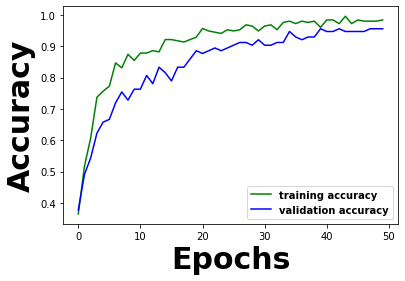

In [ ]:
import matplotlib.pyplot as plt

loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy',fontsize=30,  fontweight='bold')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

plt.legend()
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


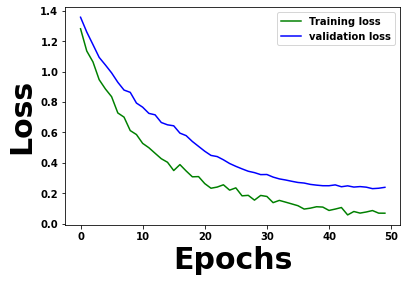

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
#plt.title('Training and Validation loss')
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Loss',fontsize=30,fontweight='bold')
plt.legend()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

plt.show()

Epoch 1/35
16/16 [==============================] - 1s 86ms/step - loss: 0.1988 - accuracy: 0.3789 - val_loss: 0.1886 - val_accuracy: 0.2558
Epoch 2/35
16/16 [==============================] - 1s 74ms/step - loss: 0.1775 - accuracy: 0.6797 - val_loss: 0.1869 - val_accuracy: 0.2558
Epoch 3/35
16/16 [==============================] - 1s 73ms/step - loss: 0.1636 - accuracy: 0.8477 - val_loss: 0.1856 - val_accuracy: 0.2907
Epoch 4/35
16/16 [==============================] - 1s 75ms/step - loss: 0.1513 - accuracy: 0.8164 - val_loss: 0.1846 - val_accuracy: 0.3256
Epoch 5/35
16/16 [==============================] - 1s 74ms/step - loss: 0.1456 - accuracy: 0.7734 - val_loss: 0.1836 - val_accuracy: 0.4070
Epoch 6/35
16/16 [==============================] - 1s 74ms/step - loss: 0.1388 - accuracy: 0.8203 - val_loss: 0.1825 - val_accuracy: 0.7442
Epoch 7/35
16/16 [==============================] - 1s 74ms/step - loss: 0.1340 - accuracy: 0.8164 - val_loss: 0.1816 - val_accuracy: 0.7093
Epoch 8/35
16

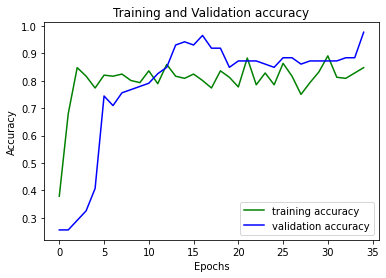

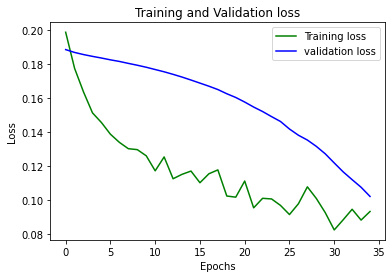

In [ ]:
epochs = 100
input_s= (x_train.shape[1],1)

  ##Assume each row is 200 time steps 
  #Sample-Current-Model 
  #I/P-->1DConvLayer-->BatchNormalization-->MaxPool-->1DConvLayer-->BatchNormalization-->MaxPool-->Flattenlayer-->Dense-->Dense-->Dense-->Dense-->O/p

model = Sequential()
model.add(Conv1D(filters=60, kernel_size=3, activation='relu',input_shape=(input_s)))
model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=3, strides = 3))
model.add(BatchNormalization())
model.add(Conv1D(filters=60, kernel_size=7, activation='relu'))
#model.add(Dropout(0.7))
model.add(MaxPooling1D(pool_size=3, strides = 3))
model.add(Conv1D(filters=120, kernel_size=5,))
model.add(MaxPooling1D(pool_size=3, strides = 3))
model.add(Conv1D(filters=120,kernel_size=5,activity_regularizer=l2(0.0001)))
model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.09))
model.add(Dense(1000, activation='relu',activity_regularizer=l2(0.0001)))
model.add(Dense(500, activation='relu',activity_regularizer=l2(0.0001)))
#model.add(Dropout(0.15))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))
###End of model definition
#print(model.summary())
#Set loss function
opt = keras.optimizers.RMSprop(lr=0.000002)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
##Training and fitting the model
hist = model.fit(x_train,y_train,epochs=35,batch_size=16,validation_data=(x_val,y_val),verbose=1)
_, accuracy = model.evaluate(x_test,y_test,verbose=1)
print(accuracy)
Z=model.predict_classes(x_test)
y_test_class = np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
  if y_test[i][0]==1:
   y_test_class[i]=0
  elif y_test[i][1]==1:
    y_test_class[i]=1
  elif y_test[i][2]==1:
    y_test_class[i]=2
  elif y_test[i][3]==1:
    y_test_class[i]=3

import sklearn
cm = sklearn.metrics.confusion_matrix(y_test_class,Z)
print(cm) 
print("Normal breath accuracy : ", (cm[0,0]/np.sum(cm[:,0])) )
print("Slow breath accuracy : ", (cm[1,1]/np.sum(cm[:,1])) )
print("Deep breath accuracy : ", (cm[2,2]/np.sum(cm[:,2])) )
print("Fast breath accuracy : ", (cm[3,3]/np.sum(cm[:,3])) )

K.clear_session()

import matplotlib.pyplot as plt

loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(0,35)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(0,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()